In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt
sns.set()
sns.set_palette(palette='deep')
import folium
from folium.plugins import FastMarkerCluster
import warnings
warnings.filterwarnings("ignore")
from sklearn.naive_bayes import GaussianNB
from lightgbm import LGBMClassifier

In [2]:
pip install eli5

In [3]:
from eli5.sklearn import PermutationImportance
from eli5 import show_weights

In [4]:
file = '/content/drive/MyDrive/Smita/Google Drive/Final_abhay Capstone/mobile_EDA_Data_Cleaning_Simple Imputation(2).csv'
social_df = pd.read_csv(file)

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
social_df.head()

,Taken_product,Yearly_avg_view_on_travel_page,preferred_device,total_likes_on_outstation_checkin_given,yearly_avg_Outstation_checkins,member_in_family,preferred_location_type,Yearly_avg_comment_on_travel_page,total_likes_on_outofstation_checkin_received,week_since_last_outstation_checkin,montly_avg_comment_on_company_page,travelling_network_rating,Daily_Avg_mins_spend_on_traveling_page,Adult_flag_1,working_flag_Yes,following_company_page_Yes
0,1,307.0,1.0,38570.0,1.0,2,9,94.0,5993.0,8,11.0,1,8.0,0,0,1
1,0,367.0,1.0,9765.0,1.0,1,9,61.0,5130.0,1,23.0,4,10.0,1,1,0
2,1,277.0,1.0,48055.0,1.0,2,6,92.0,2090.0,6,15.0,2,7.0,0,0,1
3,0,247.0,1.0,48720.0,1.0,4,9,56.0,2909.0,1,11.0,3,8.0,0,0,1
4,0,202.0,1.0,20685.0,1.0,1,7,40.0,3468.0,9,12.0,4,6.0,1,0,0


In [7]:
social_df.shape

(10652, 16)

In [8]:
social_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10652 entries, 0 to 10651
Data columns (total 16 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Taken_product                                 10652 non-null  int64  
 1   Yearly_avg_view_on_travel_page                10652 non-null  float64
 2   preferred_device                              10652 non-null  float64
 3   total_likes_on_outstation_checkin_given       10652 non-null  float64
 4   yearly_avg_Outstation_checkins                10652 non-null  float64
 5   member_in_family                              10652 non-null  int64  
 6   preferred_location_type                       10652 non-null  int64  
 7   Yearly_avg_comment_on_travel_page             10652 non-null  float64
 8   total_likes_on_outofstation_checkin_received  10652 non-null  float64
 9   week_since_last_outstation_checkin            10652 non-null 

In [9]:
X = social_df.drop('Taken_product', axis=1)

y = social_df.pop("Taken_product")

X.head()

,Yearly_avg_view_on_travel_page,preferred_device,total_likes_on_outstation_checkin_given,yearly_avg_Outstation_checkins,member_in_family,preferred_location_type,Yearly_avg_comment_on_travel_page,total_likes_on_outofstation_checkin_received,week_since_last_outstation_checkin,montly_avg_comment_on_company_page,travelling_network_rating,Daily_Avg_mins_spend_on_traveling_page,Adult_flag_1,working_flag_Yes,following_company_page_Yes
0,307.0,1.0,38570.0,1.0,2,9,94.0,5993.0,8,11.0,1,8.0,0,0,1
1,367.0,1.0,9765.0,1.0,1,9,61.0,5130.0,1,23.0,4,10.0,1,1,0
2,277.0,1.0,48055.0,1.0,2,6,92.0,2090.0,6,15.0,2,7.0,0,0,1
3,247.0,1.0,48720.0,1.0,4,9,56.0,2909.0,1,11.0,3,8.0,0,0,1
4,202.0,1.0,20685.0,1.0,1,7,40.0,3468.0,9,12.0,4,6.0,1,0,0


In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=1)

## Base model

##1) Decision Tree Base Model

In [11]:
from sklearn.tree import DecisionTreeClassifier

from IPython.display import Image  
#import pydotplus as pydot
from sklearn import tree
from os import system

In [12]:
# Building a Decision Tree Classifier
dt_model = DecisionTreeClassifier(criterion = 'gini', random_state=1)

In [13]:
# Fit the model
dt_model.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')

Print Feature Importances for DT Model

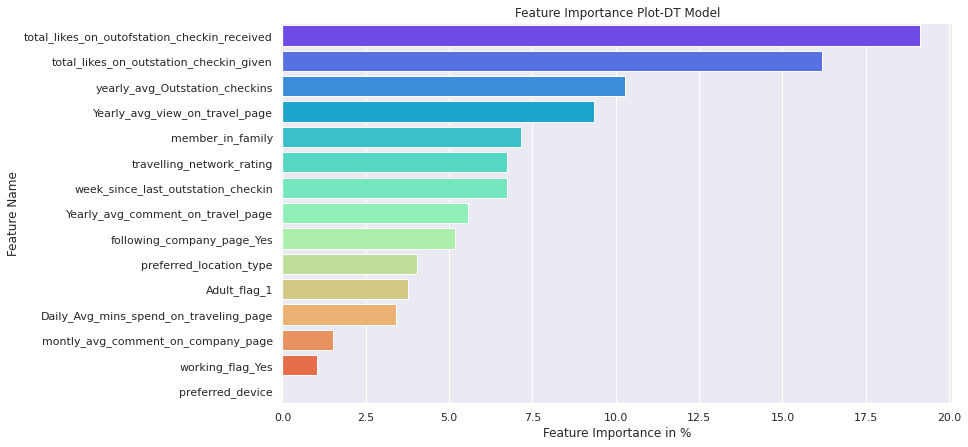

In [14]:


x=pd.DataFrame(dt_model.feature_importances_*100,index=X_train.columns).sort_values(by=0,ascending=False)
plt.figure(figsize=(12,7))
sns.barplot(x[0],x.index,palette='rainbow')
plt.ylabel('Feature Name')
plt.xlabel('Feature Importance in %')
plt.title('Feature Importance Plot-DT Model')
plt.show()

In [15]:
# Variable Importance

print (pd.DataFrame(dt_model.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values('Imp',ascending=False)*100)

                                                    Imp
total_likes_on_outofstation_checkin_received  19.131100
total_likes_on_outstation_checkin_given       16.177044
yearly_avg_Outstation_checkins                10.266413
Yearly_avg_view_on_travel_page                 9.339283
member_in_family                               7.168167
travelling_network_rating                      6.723772
week_since_last_outstation_checkin             6.722497
Yearly_avg_comment_on_travel_page              5.569942
following_company_page_Yes                     5.172777
preferred_location_type                        4.024305
Adult_flag_1                                   3.758702
Daily_Avg_mins_spend_on_traveling_page         3.399422
montly_avg_comment_on_company_page             1.503693
working_flag_Yes                               1.042882
preferred_device                               0.000000


In [16]:
perm = PermutationImportance(dt_model, scoring = 'accuracy' ,random_state=101).fit(X_test, y_test)
show_weights(perm, feature_names = list(X_test.columns))

Weight,Feature
0.1239 ± 0.0123,total_likes_on_outofstation_checkin_received
0.1221 ± 0.0169,following_company_page_Yes
0.0921 ± 0.0088,Adult_flag_1
0.0630 ± 0.0086,Yearly_avg_view_on_travel_page
0.0574 ± 0.0051,total_likes_on_outstation_checkin_given
0.0531 ± 0.0084,week_since_last_outstation_checkin
0.0479 ± 0.0059,yearly_avg_Outstation_checkins
0.0458 ± 0.0094,travelling_network_rating
0.0424 ± 0.0063,member_in_family
0.0313 ± 0.0039,Daily_Avg_mins_spend_on_traveling_page


Performing Predictions on Train and Test data with the DT Model

In [17]:
# Predicting Test Data
y_predict = dt_model.predict(X_test)

In [18]:
# Predicting train Data
y_predict_train = dt_model.predict(X_train)

Classification report on train data for DT Model

In [19]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_auc_score,roc_curve

In [20]:
print("classification on Train data:")
print(classification_report(y_train,y_predict_train))
print("\n")
print("classification on Test data:")
print(classification_report(y_test,y_predict))

classification on Train data:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6330
           1       1.00      1.00      1.00      1126

    accuracy                           1.00      7456
   macro avg       1.00      1.00      1.00      7456
weighted avg       1.00      1.00      1.00      7456



classification on Test data:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      2702
           1       0.93      0.89      0.91       494

    accuracy                           0.97      3196
   macro avg       0.96      0.94      0.95      3196
weighted avg       0.97      0.97      0.97      3196



AUC and ROC for the test data for DT Model

Area Under the Curve is 94.0 %


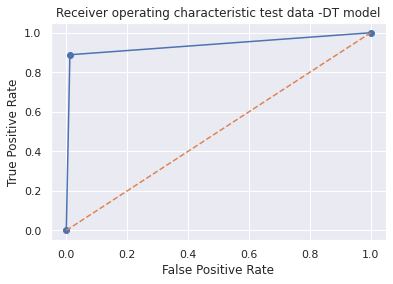

In [21]:
# Plot ROC_Curve

dt_fpr, dt_tpr,_=roc_curve(y_test,dt_model.predict_proba(X_test)[:,1])
plt.plot(dt_fpr,dt_tpr, marker='o', label='Decision Tree')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic test data -DT model')
print('Area Under the Curve is',round(roc_auc_score(y_test,dt_model.predict_proba(X_test)[:,1]),2)*100,'%')
plt.show()

AUC and ROC for the train data for DT Model

Area Under the Curve is 100.0 %


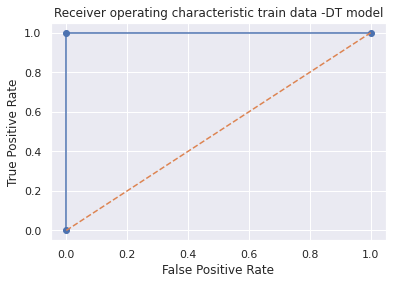

In [22]:
# Plot ROC_Curve

dt_fpr, dt_tpr,_=roc_curve(y_train,dt_model.predict_proba(X_train)[:,1])
plt.plot(dt_fpr,dt_tpr, marker='o', label='Decision Tree')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic train data -DT model')
print('Area Under the Curve is',round(roc_auc_score(y_train,dt_model.predict_proba(X_train)[:,1]),2)*100,'%')
plt.show()

Confusion Matrix for the training data-DT Model

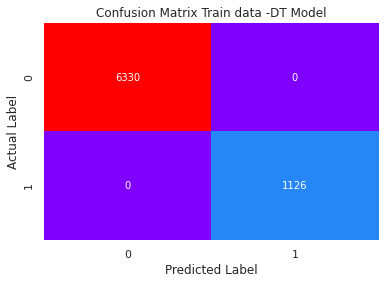

In [23]:
# Print Confusion Matrix

sns.heatmap(confusion_matrix(y_train,y_predict_train),annot=True, fmt='d', cbar=False,cmap='rainbow')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix Train data -DT Model')
plt.show()
plt.show()

Confusion Matrix for the test data-DT Model

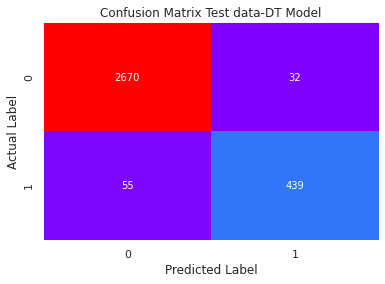

In [24]:
# Print Confusion Matrix

sns.heatmap(confusion_matrix(y_test,y_predict),annot=True, fmt='d', cbar=False,cmap='rainbow')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix Test data-DT Model')
plt.show()

## 2) Ensemble Learning - Bagging Base model

In [25]:
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_auc_score,roc_curve
import sklearn.metrics as metrics

In [26]:
bgcl = BaggingClassifier( n_estimators=50,random_state=1, base_estimator=dt_model)

bgcl = bgcl.fit(X_train, y_train)

1.0


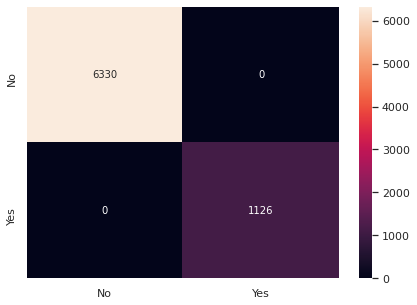

In [27]:
y_predict = bgcl.predict(X_train)

print(bgcl.score(X_train , y_train))

cm=metrics.confusion_matrix(y_train, y_predict,labels=[0, 1])


df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

In [28]:
print(metrics.classification_report(y_train, y_predict,digits=2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6330
           1       1.00      1.00      1.00      1126

    accuracy                           1.00      7456
   macro avg       1.00      1.00      1.00      7456
weighted avg       1.00      1.00      1.00      7456



0.9815394242803505


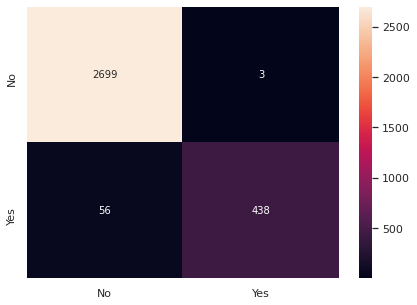

In [29]:
y_predict = bgcl.predict(X_test)

print(bgcl.score(X_test , y_test))


cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g');

In [30]:
print(metrics.classification_report(y_test, y_predict,digits=2))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      2702
           1       0.99      0.89      0.94       494

    accuracy                           0.98      3196
   macro avg       0.99      0.94      0.96      3196
weighted avg       0.98      0.98      0.98      3196



No handles with labels found to put in legend.


AUC: 1.000


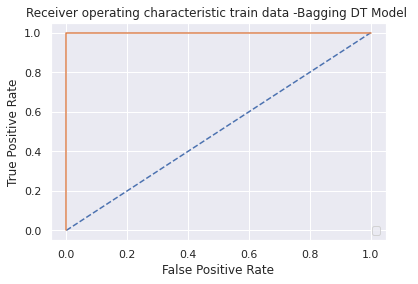

In [31]:
# predict probabilities
probs = bgcl.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % train_auc)
# calculate roc curve
train_fpr,train_tpr,train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic train data -Bagging DT Model ')
plt.legend(loc="lower right")
plt.savefig('Bagging DT _ROC')

No handles with labels found to put in legend.


AUC: 0.999


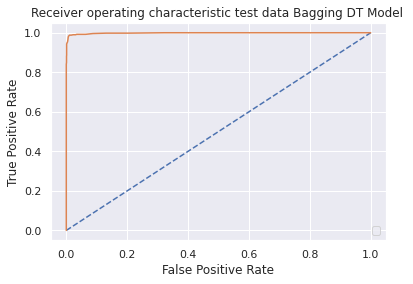

In [32]:
# predict probabilities
probs = bgcl.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % test_auc)
# calculate roc curve
test_fpr,test_tpr,test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic test data Bagging DT Model ')
plt.legend(loc="lower right")
plt.savefig('Bagging DT_ROC')
plt.show()

In [33]:
feature_importances = np.mean([
    tree.feature_importances_ for tree in bgcl.estimators_
], axis=0)

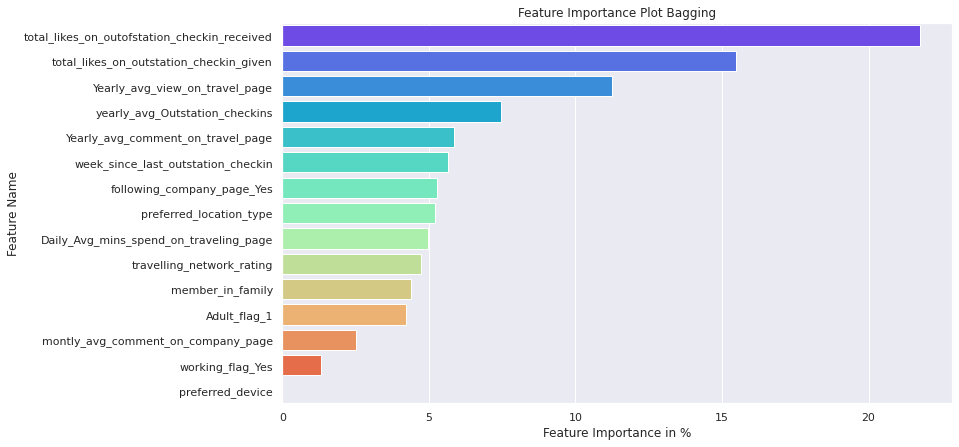

In [34]:
x=pd.DataFrame(feature_importances*100,index=X_train.columns).sort_values(by=0,ascending=False)
plt.figure(figsize=(12,7))
sns.barplot(x[0],x.index,palette='rainbow')
plt.ylabel('Feature Name')
plt.xlabel('Feature Importance in %')
plt.title('Feature Importance Plot Bagging')
plt.show()

In [35]:
perm = PermutationImportance(bgcl, scoring = 'accuracy' ,random_state=101).fit(X_test, y_test)
show_weights(perm, feature_names = list(X_test.columns))

Weight,Feature
0.1067 ± 0.0077,following_company_page_Yes
0.0961 ± 0.0083,total_likes_on_outofstation_checkin_received
0.0665 ± 0.0104,Adult_flag_1
0.0377 ± 0.0056,Yearly_avg_view_on_travel_page
0.0355 ± 0.0055,total_likes_on_outstation_checkin_given
0.0339 ± 0.0022,yearly_avg_Outstation_checkins
0.0261 ± 0.0025,week_since_last_outstation_checkin
0.0205 ± 0.0019,preferred_location_type
0.0188 ± 0.0025,travelling_network_rating
0.0121 ± 0.0025,Daily_Avg_mins_spend_on_traveling_page


## 3)Ensemble Learning - Bagging

In [36]:
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_auc_score,roc_curve
import sklearn.metrics as metrics

In [37]:
bgcl = BaggingClassifier( n_estimators=50,random_state=1)

bgcl = bgcl.fit(X_train, y_train)

Classification report on Bagging Model -Train Set

1.0


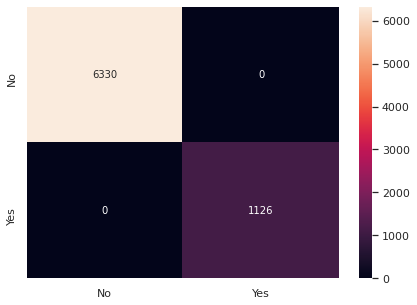

In [38]:
y_predict = bgcl.predict(X_train)

print(bgcl.score(X_train , y_train))

cm=metrics.confusion_matrix(y_train, y_predict,labels=[0, 1])


df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

In [39]:
print(metrics.classification_report(y_train, y_predict,digits=2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6330
           1       1.00      1.00      1.00      1126

    accuracy                           1.00      7456
   macro avg       1.00      1.00      1.00      7456
weighted avg       1.00      1.00      1.00      7456



Classification report on Bagging Model -Test Set

0.9815394242803505


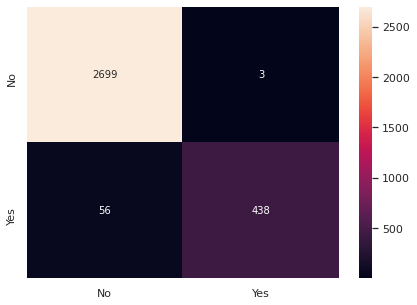

In [40]:

y_predict = bgcl.predict(X_test)

print(bgcl.score(X_test , y_test))


cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g');

In [41]:
print(metrics.classification_report(y_test, y_predict,digits=2))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      2702
           1       0.99      0.89      0.94       494

    accuracy                           0.98      3196
   macro avg       0.99      0.94      0.96      3196
weighted avg       0.98      0.98      0.98      3196



No handles with labels found to put in legend.


AUC: 1.000


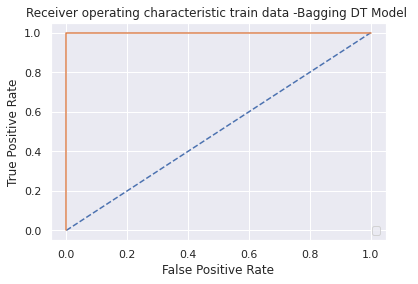

In [42]:
# predict probabilities
probs = bgcl.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % train_auc)
# calculate roc curve
train_fpr,train_tpr,train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic train data -Bagging DT Model ')
plt.legend(loc="lower right")
plt.savefig('Bagging DT _ROC')

No handles with labels found to put in legend.


AUC: 0.999


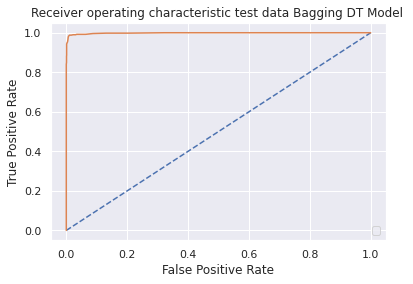

In [43]:
# predict probabilities
probs = bgcl.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % test_auc)
# calculate roc curve
test_fpr,test_tpr,test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic test data Bagging DT Model ')
plt.legend(loc="lower right")
plt.savefig('Bagging DT_ROC')
plt.show()

Feature Importance

In [44]:
feature_importances = np.mean([
    tree.feature_importances_ for tree in bgcl.estimators_
], axis=0)

In [45]:

print (pd.DataFrame(feature_importances, columns = ["Imp"], index = X_train.columns).sort_values('Imp',ascending=False)*100)

                                                    Imp
total_likes_on_outofstation_checkin_received  21.762380
total_likes_on_outstation_checkin_given       15.469194
Yearly_avg_view_on_travel_page                11.231099
yearly_avg_Outstation_checkins                 7.445051
Yearly_avg_comment_on_travel_page              5.841161
week_since_last_outstation_checkin             5.642528
following_company_page_Yes                     5.284404
preferred_location_type                        5.197995
Daily_Avg_mins_spend_on_traveling_page         4.976651
travelling_network_rating                      4.715578
member_in_family                               4.394374
Adult_flag_1                                   4.200424
montly_avg_comment_on_company_page             2.515446
working_flag_Yes                               1.323714
preferred_device                               0.000000


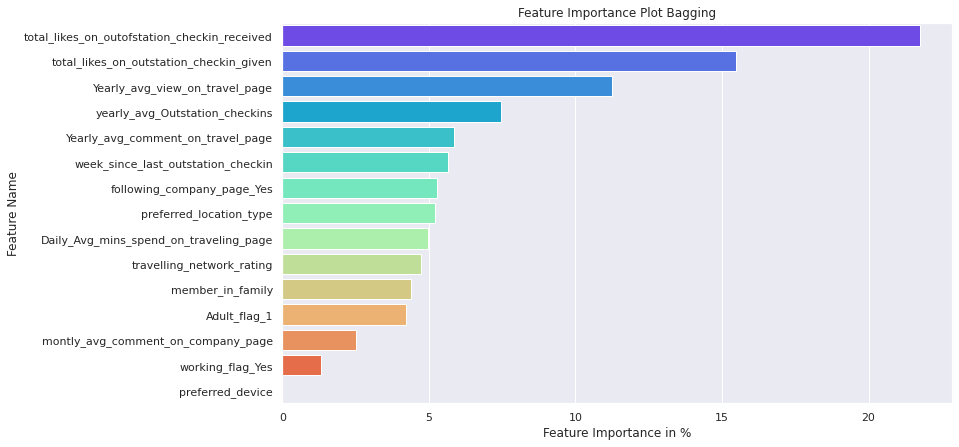

In [46]:
x=pd.DataFrame(feature_importances*100,index=X_train.columns).sort_values(by=0,ascending=False)
plt.figure(figsize=(12,7))
sns.barplot(x[0],x.index,palette='rainbow')
plt.ylabel('Feature Name')
plt.xlabel('Feature Importance in %')
plt.title('Feature Importance Plot Bagging')
plt.show()

In [47]:
perm = PermutationImportance(bgcl, scoring = 'accuracy' ,random_state=101).fit(X_test, y_test)
show_weights(perm, feature_names = list(X_test.columns))

Weight,Feature
0.1067 ± 0.0077,following_company_page_Yes
0.0961 ± 0.0083,total_likes_on_outofstation_checkin_received
0.0665 ± 0.0104,Adult_flag_1
0.0377 ± 0.0056,Yearly_avg_view_on_travel_page
0.0355 ± 0.0055,total_likes_on_outstation_checkin_given
0.0339 ± 0.0022,yearly_avg_Outstation_checkins
0.0261 ± 0.0025,week_since_last_outstation_checkin
0.0205 ± 0.0019,preferred_location_type
0.0188 ± 0.0025,travelling_network_rating
0.0121 ± 0.0025,Daily_Avg_mins_spend_on_traveling_page


## 4) Ensemble Learning - AdaBoosting

In [48]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score 

In [49]:
abcl = AdaBoostClassifier(n_estimators=1000, random_state=1)
abcl = abcl.fit(X_train, y_train)

Classification report on Adaboosting Model -Train Set

0.8944474248927039


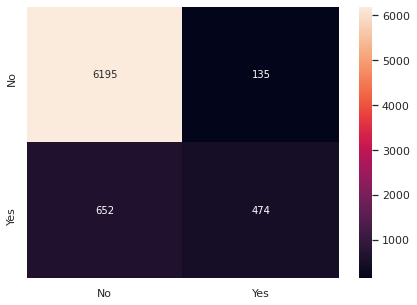

In [50]:
y_predict = abcl.predict(X_train)
print(abcl.score(X_train, y_train))

cm = metrics.confusion_matrix(y_train, y_predict, labels=[0,1])

df_cm = pd.DataFrame(cm, index=[i for i in ['No','Yes']],
                     columns  = [i for i in ['No', 'Yes']])

plt.figure(figsize=(7,5))

sns.heatmap(df_cm , annot=True,fmt = 'g')

In [51]:
print(metrics.classification_report(y_train, y_predict, digits=2))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94      6330
           1       0.78      0.42      0.55      1126

    accuracy                           0.89      7456
   macro avg       0.84      0.70      0.74      7456
weighted avg       0.89      0.89      0.88      7456



Classification report on Adaboosting Model -Test Set

0.8836045056320401


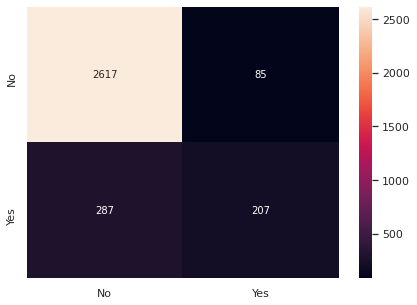

In [52]:
y_predict = abcl.predict(X_test)
print(abcl.score(X_test, y_test))

cm = metrics.confusion_matrix(y_test, y_predict, labels=[0,1])
df_cm = pd.DataFrame(cm, index=[i for i in ['No', 'Yes']],
                     columns = [i for i in ['No', 'Yes']])

plt.figure(figsize=(7,5))

sns.heatmap(df_cm, annot=True, fmt = 'g');

In [53]:
print(metrics.classification_report(y_test, y_predict, digits=2))

              precision    recall  f1-score   support

           0       0.90      0.97      0.93      2702
           1       0.71      0.42      0.53       494

    accuracy                           0.88      3196
   macro avg       0.81      0.69      0.73      3196
weighted avg       0.87      0.88      0.87      3196



No handles with labels found to put in legend.


AUC: 0.929


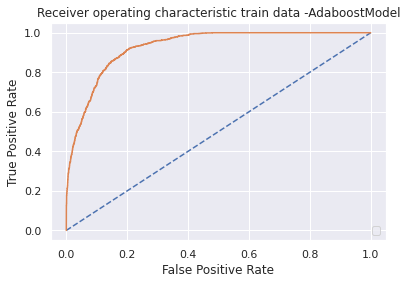

In [54]:
# predict probabilities
probs = abcl.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % train_auc)
# calculate roc curve
train_fpr,train_tpr,train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic train data -AdaboostModel')
plt.legend(loc="lower right")
plt.savefig('Adaboost Model _ROC')

No handles with labels found to put in legend.


AUC: 0.901


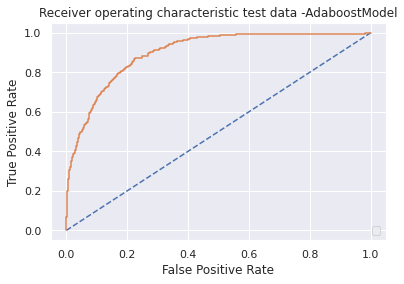

In [55]:
# predict probabilities
probs = abcl.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % test_auc)
# calculate roc curve
test_fpr,test_tpr,test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic test data -AdaboostModel')
plt.legend(loc="lower right")
plt.savefig('Adaboost Model _ROC')

Feature Importance

In [56]:
print (pd.DataFrame(abcl.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values('Imp',ascending=False)*100)

                                               Imp
total_likes_on_outstation_checkin_given       52.2
total_likes_on_outofstation_checkin_received  27.3
Yearly_avg_view_on_travel_page                 6.2
yearly_avg_Outstation_checkins                 4.4
Daily_Avg_mins_spend_on_traveling_page         2.7
Yearly_avg_comment_on_travel_page              2.6
week_since_last_outstation_checkin             1.0
preferred_location_type                        0.8
following_company_page_Yes                     0.7
Adult_flag_1                                   0.6
member_in_family                               0.5
montly_avg_comment_on_company_page             0.5
travelling_network_rating                      0.5
preferred_device                               0.0
working_flag_Yes                               0.0


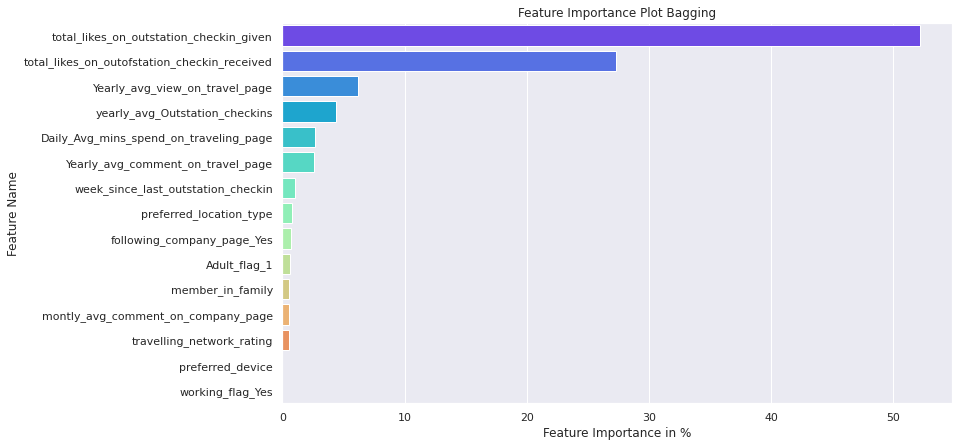

In [57]:
x=pd.DataFrame(abcl.feature_importances_*100,index=X_train.columns).sort_values(by=0,ascending=False)
plt.figure(figsize=(12,7))
sns.barplot(x[0],x.index,palette='rainbow')
plt.ylabel('Feature Name')
plt.xlabel('Feature Importance in %')
plt.title('Feature Importance Plot Bagging')
plt.show()

In [58]:
perm = PermutationImportance(abcl, scoring = 'accuracy' ,random_state=101).fit(X_test, y_test)
show_weights(perm, feature_names = list(X_test.columns))

Weight,Feature
0.0293 ± 0.0060,following_company_page_Yes
0.0292 ± 0.0047,total_likes_on_outofstation_checkin_received
0.0201 ± 0.0027,total_likes_on_outstation_checkin_given
0.0154 ± 0.0082,Adult_flag_1
0.0108 ± 0.0058,week_since_last_outstation_checkin
0.0079 ± 0.0047,yearly_avg_Outstation_checkins
0.0076 ± 0.0055,travelling_network_rating
0.0049 ± 0.0031,preferred_location_type
0.0043 ± 0.0068,Yearly_avg_view_on_travel_page
0 ± 0.0000,working_flag_Yes


## 5) Ensemble Learning - AdaBoosting with base Estimater DT

In [59]:
abcl_D = AdaBoostClassifier(n_estimators=500,  random_state=1)
abcl_D = abcl_D.fit(X_train, y_train)

Classification report on Adaboosting Model -Train Set

0.8908261802575107


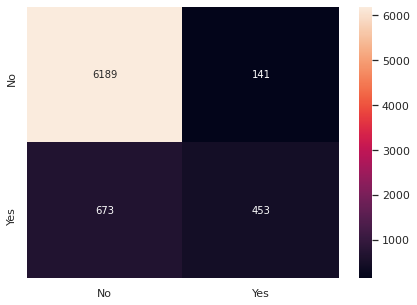

In [60]:
y_predict = abcl_D.predict(X_train)
print(abcl_D.score(X_train, y_train))

cm = metrics.confusion_matrix(y_train, y_predict, labels=[0,1])

df_cm = pd.DataFrame(cm, index=[i for i in ['No','Yes']],
                     columns  = [i for i in ['No', 'Yes']])

plt.figure(figsize=(7,5))

sns.heatmap(df_cm , annot=True,fmt = 'g')

In [61]:
print(metrics.classification_report(y_train, y_predict, digits=2))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94      6330
           1       0.76      0.40      0.53      1126

    accuracy                           0.89      7456
   macro avg       0.83      0.69      0.73      7456
weighted avg       0.88      0.89      0.88      7456



Classification report on Adaboosting Model -Test Set

0.8839173967459324


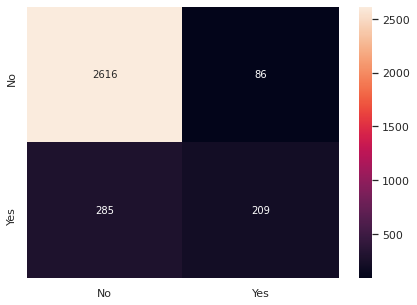

In [62]:
y_predict = abcl_D.predict(X_test)
print(abcl_D.score(X_test, y_test))

cm = metrics.confusion_matrix(y_test, y_predict, labels=[0,1])
df_cm = pd.DataFrame(cm, index=[i for i in ['No', 'Yes']],
                     columns = [i for i in ['No', 'Yes']])

plt.figure(figsize=(7,5))

sns.heatmap(df_cm, annot=True, fmt = 'g');

In [63]:
print(metrics.classification_report(y_test, y_predict, digits=2))

              precision    recall  f1-score   support

           0       0.90      0.97      0.93      2702
           1       0.71      0.42      0.53       494

    accuracy                           0.88      3196
   macro avg       0.81      0.70      0.73      3196
weighted avg       0.87      0.88      0.87      3196



Feature Importance

In [64]:
print (pd.DataFrame(abcl_D.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values('Imp',ascending=False)*100)

                                               Imp
total_likes_on_outstation_checkin_given       49.2
total_likes_on_outofstation_checkin_received  28.6
Yearly_avg_view_on_travel_page                 6.0
yearly_avg_Outstation_checkins                 3.6
Daily_Avg_mins_spend_on_traveling_page         3.4
Yearly_avg_comment_on_travel_page              3.0
preferred_location_type                        1.2
week_since_last_outstation_checkin             1.2
following_company_page_Yes                     1.0
travelling_network_rating                      0.8
Adult_flag_1                                   0.8
member_in_family                               0.6
montly_avg_comment_on_company_page             0.6
preferred_device                               0.0
working_flag_Yes                               0.0


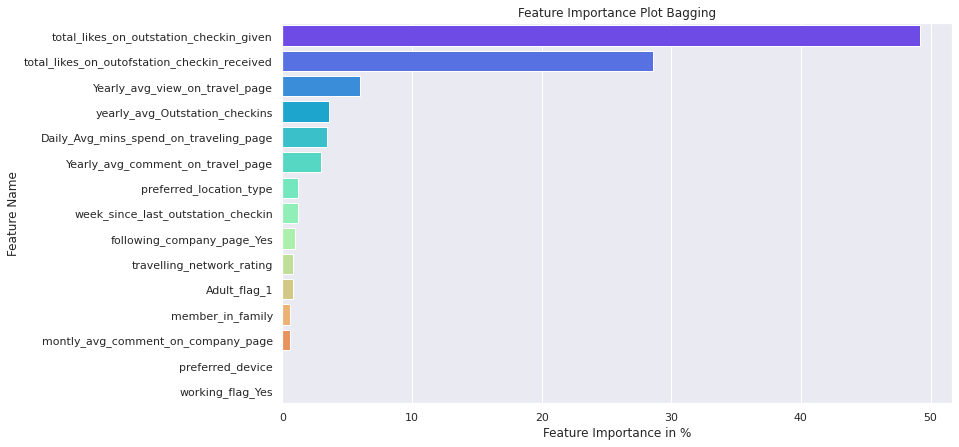

In [65]:
x=pd.DataFrame(abcl_D.feature_importances_*100,index=X_train.columns).sort_values(by=0,ascending=False)
plt.figure(figsize=(12,7))
sns.barplot(x[0],x.index,palette='rainbow')
plt.ylabel('Feature Name')
plt.xlabel('Feature Importance in %')
plt.title('Feature Importance Plot Bagging')
plt.show()

In [66]:
perm = PermutationImportance(abcl_D, scoring = 'accuracy' ,random_state=101).fit(X_test, y_test)
show_weights(perm, feature_names = list(X_test.columns))

Weight,Feature
0.0307 ± 0.0051,following_company_page_Yes
0.0299 ± 0.0044,total_likes_on_outofstation_checkin_received
0.0186 ± 0.0038,total_likes_on_outstation_checkin_given
0.0183 ± 0.0084,Adult_flag_1
0.0137 ± 0.0031,week_since_last_outstation_checkin
0.0080 ± 0.0008,preferred_location_type
0.0076 ± 0.0038,travelling_network_rating
0.0068 ± 0.0018,yearly_avg_Outstation_checkins
0.0055 ± 0.0068,Yearly_avg_view_on_travel_page
0.0012 ± 0.0029,Daily_Avg_mins_spend_on_traveling_page


## 6)Ensemble Learning - GradientBoost(GBM)

In [67]:
from sklearn.ensemble import GradientBoostingClassifier

In [68]:
gbcl = GradientBoostingClassifier(n_estimators=1000, random_state=1, max_depth=9)
bgcl = gbcl.fit(X_train, y_train)

1.0


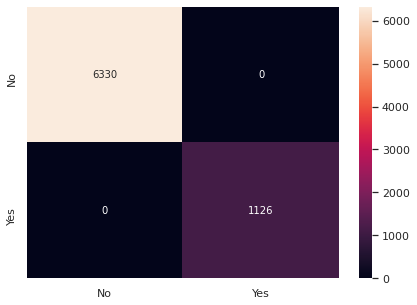

In [69]:
y_predict = gbcl.predict(X_train)
print(gbcl.score(X_train, y_train))

cm = metrics.confusion_matrix(y_train, y_predict, labels=[0,1])

df_cm = pd.DataFrame(cm, index=[i for i in ['No','Yes']],
                     columns = [i for i in ['No', 'Yes']])

plt.figure(figsize = (7,5))

sns.heatmap(df_cm, annot = True, fmt = 'g')

In [70]:
print(metrics.classification_report(y_train, y_predict, digits=2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6330
           1       1.00      1.00      1.00      1126

    accuracy                           1.00      7456
   macro avg       1.00      1.00      1.00      7456
weighted avg       1.00      1.00      1.00      7456



0.9915519399249061


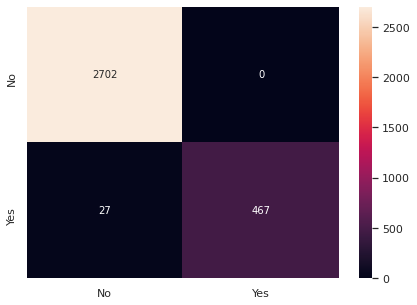

In [71]:
y_predict = gbcl.predict(X_test)
print(gbcl.score(X_test, y_test))
cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

In [72]:
print(metrics.classification_report(y_test,y_predict, digits=2))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      2702
           1       1.00      0.95      0.97       494

    accuracy                           0.99      3196
   macro avg       1.00      0.97      0.98      3196
weighted avg       0.99      0.99      0.99      3196



No handles with labels found to put in legend.


AUC: 1.000


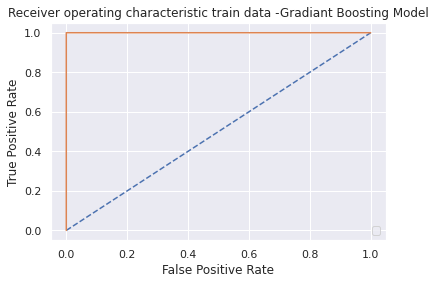

In [73]:
# predict probabilities
probs = gbcl.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % train_auc)
# calculate roc curve
train_fpr,train_tpr,train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic train data -Gradiant Boosting Model')
plt.legend(loc="lower right")
plt.savefig('Gradiant boosting Model _ROC')

No handles with labels found to put in legend.


AUC: 0.901


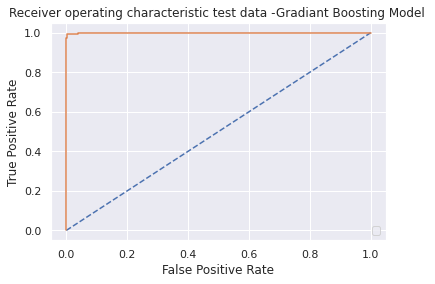

In [74]:
# predict probabilities
probs = gbcl.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
train_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % test_auc)
# calculate roc curve
test_fpr,test_tpr,test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic test data -Gradiant Boosting Model ')
plt.legend(loc="lower right")
plt.savefig('Gradiant boosting Model _ROC')

In [75]:
feature_importances = np.mean([
    gbcl.feature_importances_ for tree in bgcl.estimators_
], axis=0)

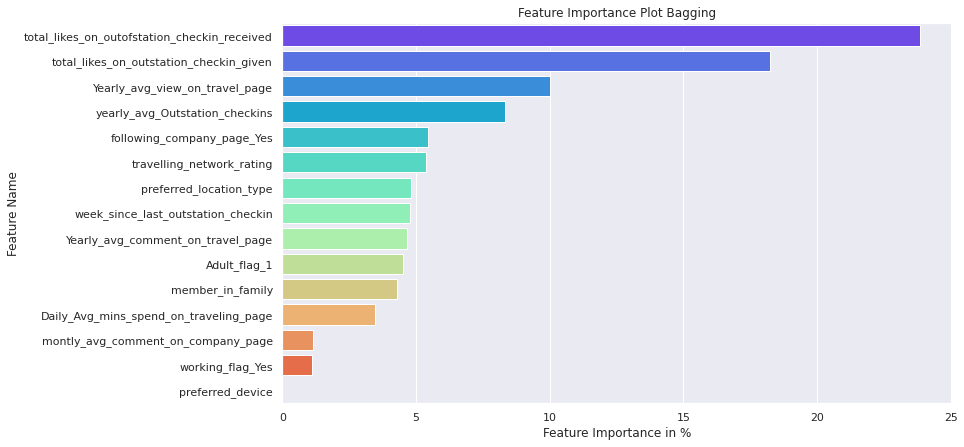

In [76]:
x=pd.DataFrame(feature_importances*100,index=X_train.columns).sort_values(by=0,ascending=False)
plt.figure(figsize=(12,7))
sns.barplot(x[0],x.index,palette='rainbow')
plt.ylabel('Feature Name')
plt.xlabel('Feature Importance in %')
plt.title('Feature Importance Plot Bagging')
plt.show()

In [77]:
#Permutation Importance
perm = PermutationImportance(bgcl, scoring = 'accuracy' ,random_state=101).fit(X_test, y_test)
show_weights(perm, feature_names = list(X_test.columns))

Weight,Feature
0.0939 ± 0.0040,total_likes_on_outofstation_checkin_received
0.0900 ± 0.0069,following_company_page_Yes
0.0524 ± 0.0087,Adult_flag_1
0.0436 ± 0.0037,total_likes_on_outstation_checkin_given
0.0287 ± 0.0036,yearly_avg_Outstation_checkins
0.0280 ± 0.0059,Yearly_avg_view_on_travel_page
0.0242 ± 0.0041,travelling_network_rating
0.0178 ± 0.0047,week_since_last_outstation_checkin
0.0149 ± 0.0047,preferred_location_type
0.0073 ± 0.0015,member_in_family


## 7) Ensemble RandomForest Classifier

In [78]:
from sklearn.ensemble import RandomForestClassifier

In [79]:
rfcl = RandomForestClassifier(n_estimators=500, random_state=1)
rfcl = rfcl.fit(X_train,y_train)

1.0


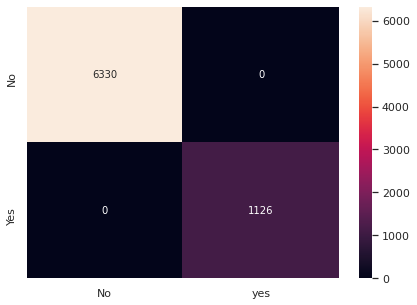

In [80]:
y_predict = rfcl.predict(X_train)

print(rfcl.score(X_train, y_train))

cm = metrics.confusion_matrix(y_train,y_predict, labels=[0,1])

df_cm = pd.DataFrame(cm, index=[ i for i in ['No', 'Yes']],
                     columns = [i for i in ['No',"yes"]])

plt.figure(figsize=(7,5))
sns.heatmap(df_cm, annot = True, fmt = 'g');

In [81]:
print(metrics.classification_report(y_train, y_predict, digits=2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6330
           1       1.00      1.00      1.00      1126

    accuracy                           1.00      7456
   macro avg       1.00      1.00      1.00      7456
weighted avg       1.00      1.00      1.00      7456



0.9809136420525657


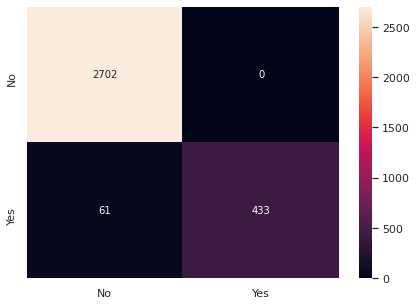

In [82]:
y_predict = rfcl.predict(X_test)
print(rfcl.score(X_test, y_test))
cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

In [83]:
print(metrics.classification_report(y_test, y_predict,digits=2))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      2702
           1       1.00      0.88      0.93       494

    accuracy                           0.98      3196
   macro avg       0.99      0.94      0.96      3196
weighted avg       0.98      0.98      0.98      3196



No handles with labels found to put in legend.


AUC: 1.000


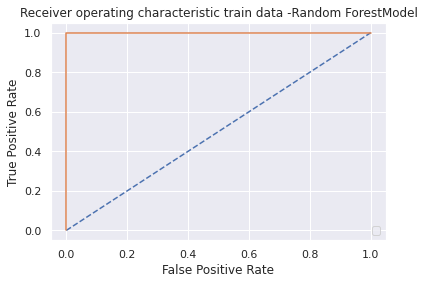

In [84]:
# predict probabilities
probs = rfcl.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % train_auc)
# calculate roc curve
train_fpr,train_tpr,train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic train data -Random ForestModel')
plt.legend(loc="lower right")
plt.savefig('Random Forest Model _ROC')

No handles with labels found to put in legend.


AUC: 0.901


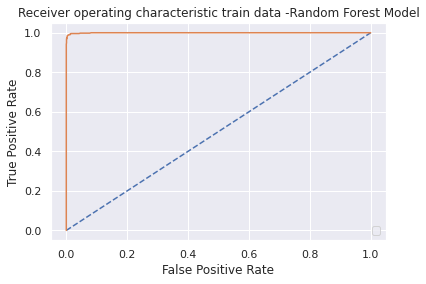

In [85]:
# predict probabilities
probs = rfcl.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
train_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % test_auc)
# calculate roc curve
test_fpr,test_tpr,test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic train data -Random Forest Model')
plt.legend(loc="lower right")
plt.savefig('Random Forest Model _ROC')

In [86]:
pd.Series(rfcl.feature_importances_*100, X_train.columns).sort_values(ascending = False)

total_likes_on_outofstation_checkin_received    15.699185
total_likes_on_outstation_checkin_given         13.087623
Yearly_avg_view_on_travel_page                  11.707973
yearly_avg_Outstation_checkins                   7.488279
Yearly_avg_comment_on_travel_page                7.455228
Daily_Avg_mins_spend_on_traveling_page           7.293768
following_company_page_Yes                       6.275438
week_since_last_outstation_checkin               6.131525
preferred_location_type                          5.914185
member_in_family                                 4.642461
travelling_network_rating                        4.595659
montly_avg_comment_on_company_page               4.288500
Adult_flag_1                                     4.000619
working_flag_Yes                                 1.419557
preferred_device                                 0.000000
dtype: float64

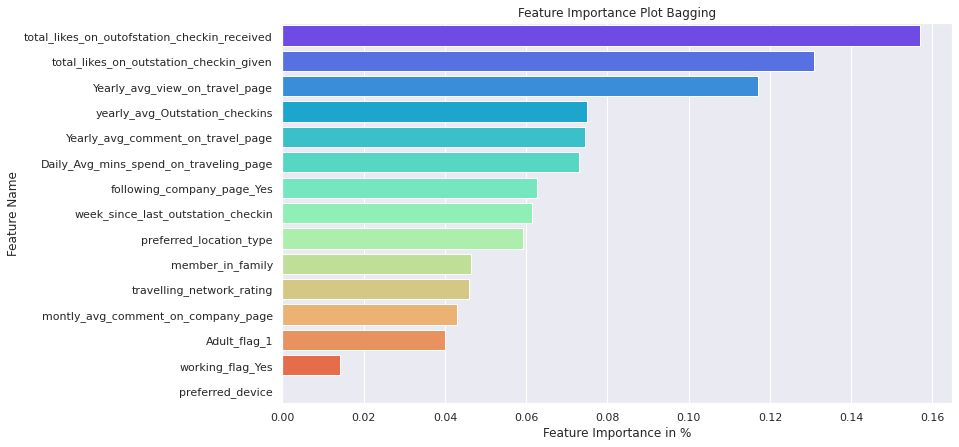

In [87]:
x=pd.DataFrame(rfcl.feature_importances_,index=X_train.columns).sort_values(by=0,ascending=False)
plt.figure(figsize=(12,7))
sns.barplot(x[0],x.index,palette='rainbow')
plt.ylabel('Feature Name')
plt.xlabel('Feature Importance in %')
plt.title('Feature Importance Plot Bagging')
plt.show()

In [88]:
#Permutation Importance
perm = PermutationImportance(rfcl, scoring = 'accuracy' ,random_state=1).fit(X_test, y_test,)
show_weights(perm, feature_names = list(X_test.columns))

Weight,Feature
0.0795 ± 0.0059,following_company_page_Yes
0.0628 ± 0.0037,total_likes_on_outofstation_checkin_received
0.0513 ± 0.0056,Adult_flag_1
0.0381 ± 0.0036,Yearly_avg_view_on_travel_page
0.0355 ± 0.0027,total_likes_on_outstation_checkin_given
0.0337 ± 0.0065,yearly_avg_Outstation_checkins
0.0260 ± 0.0023,week_since_last_outstation_checkin
0.0258 ± 0.0016,preferred_location_type
0.0242 ± 0.0027,travelling_network_rating
0.0146 ± 0.0007,member_in_family


In [89]:
# Bagging applied Random forest

In [90]:
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_auc_score,roc_curve
import sklearn.metrics as metrics

In [91]:
bgcl = BaggingClassifier( base_estimator=rfcl,n_estimators=50,random_state=1)

bgcl = bgcl.fit(X_train, y_train)

0.9982564377682404


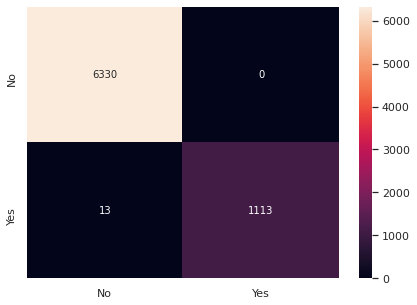

In [92]:
y_predict = bgcl.predict(X_train)

print(bgcl.score(X_train , y_train))

cm=metrics.confusion_matrix(y_train, y_predict,labels=[0, 1])


df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

In [93]:
print(metrics.classification_report(y_train, y_predict,digits=2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6330
           1       1.00      0.99      0.99      1126

    accuracy                           1.00      7456
   macro avg       1.00      0.99      1.00      7456
weighted avg       1.00      1.00      1.00      7456



In [94]:
# Classification report on Bagging Model -Test Set

0.9633917396745932


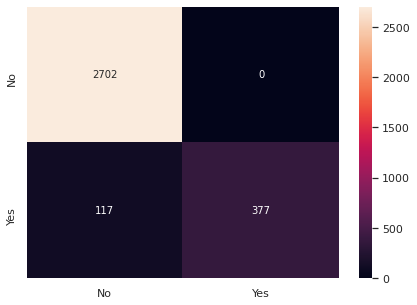

In [95]:
y_predict = bgcl.predict(X_test)

print(bgcl.score(X_test , y_test))


cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g');

In [96]:
print(metrics.classification_report(y_test, y_predict,digits=2))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      2702
           1       1.00      0.76      0.87       494

    accuracy                           0.96      3196
   macro avg       0.98      0.88      0.92      3196
weighted avg       0.96      0.96      0.96      3196



No handles with labels found to put in legend.


AUC: 1.000


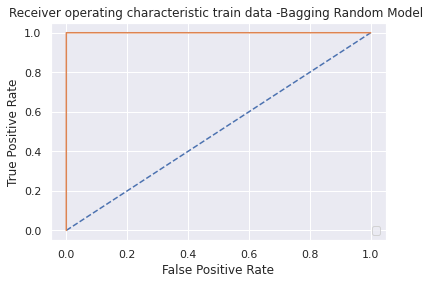

In [97]:
# predict probabilities
probs = bgcl.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % train_auc)
# calculate roc curve
train_fpr,train_tpr,train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic train data -Bagging Random Model ')
plt.legend(loc="lower right")
plt.savefig('Bagging Random _ROC')

No handles with labels found to put in legend.


AUC: 0.998


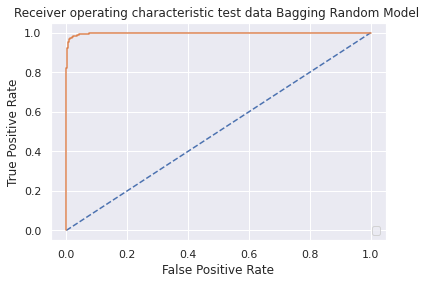

In [98]:
# predict probabilities
probs = bgcl.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % test_auc)
# calculate roc curve
test_fpr,test_tpr,test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic test data Bagging Random Model ')
plt.legend(loc="lower right")
plt.savefig('Bagging Random_ROC')
plt.show()

In [99]:
feature_importances = np.mean([
    tree.feature_importances_ for tree in bgcl.estimators_
], axis=0)

In [100]:
print (pd.DataFrame(feature_importances, columns = ["Imp"], index = X_train.columns).sort_values('Imp',ascending=False)*100)

                                                    Imp
total_likes_on_outofstation_checkin_received  15.093380
total_likes_on_outstation_checkin_given       12.205626
Yearly_avg_view_on_travel_page                12.008425
Daily_Avg_mins_spend_on_traveling_page         7.948285
Yearly_avg_comment_on_travel_page              7.857385
yearly_avg_Outstation_checkins                 7.245046
week_since_last_outstation_checkin             6.476585
following_company_page_Yes                     6.149101
preferred_location_type                        5.876340
montly_avg_comment_on_company_page             5.323875
travelling_network_rating                      4.357386
member_in_family                               4.283675
Adult_flag_1                                   3.937407
working_flag_Yes                               1.237484
preferred_device                               0.000000


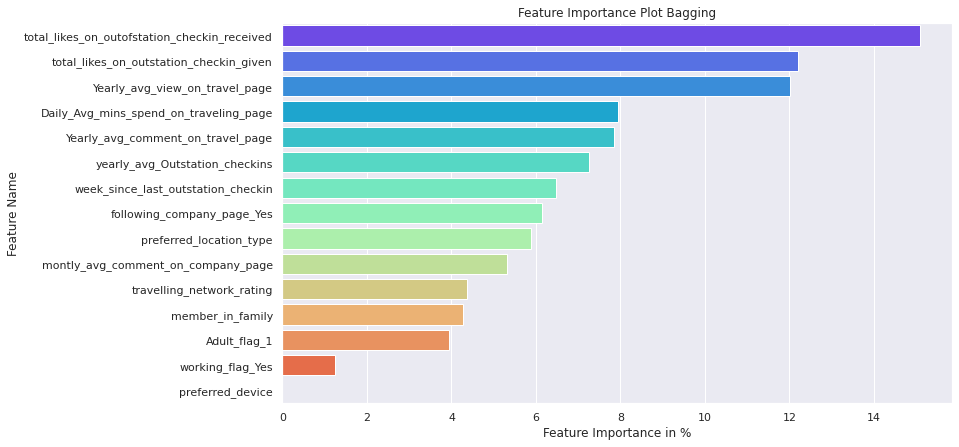

In [101]:
x=pd.DataFrame(feature_importances*100,index=X_train.columns).sort_values(by=0,ascending=False)
plt.figure(figsize=(12,7))
sns.barplot(x[0],x.index,palette='rainbow')
plt.ylabel('Feature Name')
plt.xlabel('Feature Importance in %')
plt.title('Feature Importance Plot Bagging')
plt.show()

In [102]:
perm = PermutationImportance(bgcl, scoring = 'accuracy' ,random_state=1).fit(X_test, y_test)
show_weights(perm, feature_names = list(X_test.columns))

Weight,Feature
0.0713 ± 0.0064,following_company_page_Yes
0.0620 ± 0.0035,total_likes_on_outofstation_checkin_received
0.0432 ± 0.0044,Adult_flag_1
0.0373 ± 0.0027,Yearly_avg_view_on_travel_page
0.0342 ± 0.0043,total_likes_on_outstation_checkin_given
0.0327 ± 0.0039,yearly_avg_Outstation_checkins
0.0311 ± 0.0020,preferred_location_type
0.0250 ± 0.0010,week_since_last_outstation_checkin
0.0228 ± 0.0011,travelling_network_rating
0.0180 ± 0.0015,Daily_Avg_mins_spend_on_traveling_page


## 8) LightGBM Model

In [103]:
from lightgbm import LGBMClassifier

In [104]:
lgbm = LGBMClassifier()
lgbm = lgbm.fit(X_train, y_train)

0.9943669527896996


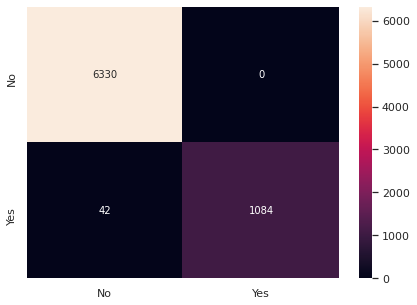

In [105]:
y_predict = lgbm.predict(X_train)
print(lgbm.score(X_train,y_train))

cm = metrics.confusion_matrix(y_train, y_predict, labels=[0,1])

df_cm = pd.DataFrame(cm, index= [i for i in ['No','Yes']],
                     columns = [i for i in ['No','Yes']])

plt.figure(figsize = (7,5))

sns.heatmap(df_cm, annot=True, fmt = 'g');

In [106]:
print(metrics,classification_report(y_train, y_predict, digits=2))

<module 'sklearn.metrics' from '/usr/local/lib/python3.7/dist-packages/sklearn/metrics/__init__.py'>               precision    recall  f1-score   support

           0       0.99      1.00      1.00      6330
           1       1.00      0.96      0.98      1126

    accuracy                           0.99      7456
   macro avg       1.00      0.98      0.99      7456
weighted avg       0.99      0.99      0.99      7456



0.9771589486858573


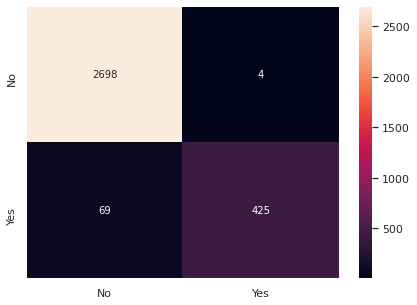

In [107]:
y_predict = lgbm .predict(X_test)
print(lgbm .score(X_test, y_test))
cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

In [108]:
print(metrics.classification_report(y_test, y_predict,digits=2))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      2702
           1       0.99      0.86      0.92       494

    accuracy                           0.98      3196
   macro avg       0.98      0.93      0.95      3196
weighted avg       0.98      0.98      0.98      3196



No handles with labels found to put in legend.


AUC: 1.000


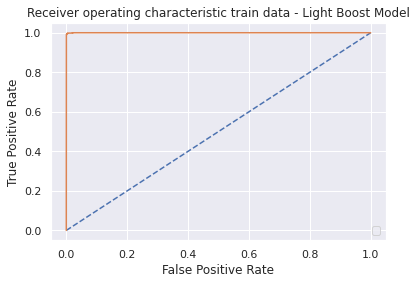

In [109]:
# predict probabilities
probs = lgbm.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % train_auc)
# calculate roc curve
train_fpr,train_tpr,train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic train data - Light Boost Model')
plt.legend(loc="lower right")
plt.savefig('Light Boost Model _ROC')

No handles with labels found to put in legend.


AUC: 0.997


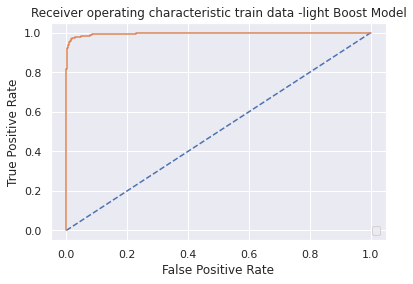

In [110]:
# predict probabilities
probs = lgbm.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % test_auc)
# calculate roc curve
test_fpr,test_tpr,test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic train data -light Boost Model')
plt.legend(loc="lower right")
plt.savefig('Light Boost Model _ROC')

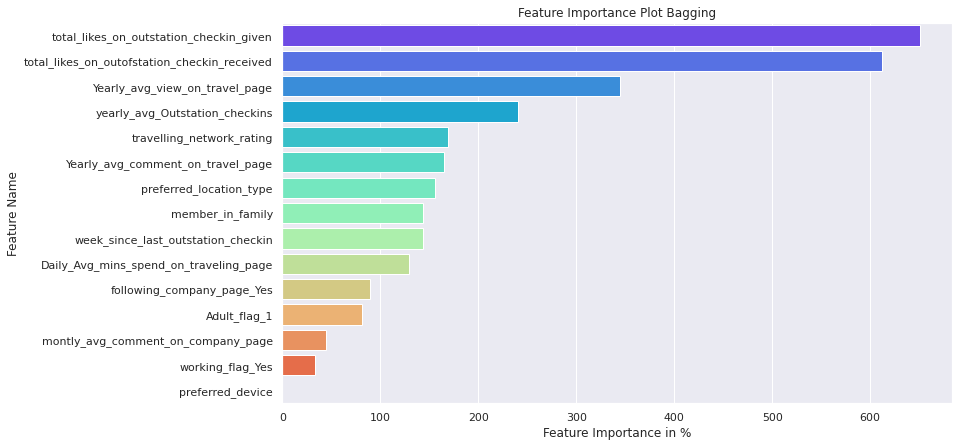

In [111]:
x=pd.DataFrame(lgbm.feature_importances_,index=X_train.columns).sort_values(by=0,ascending=False)
plt.figure(figsize=(12,7))
sns.barplot(x[0],x.index,palette='rainbow')
plt.ylabel('Feature Name')
plt.xlabel('Feature Importance in %')
plt.title('Feature Importance Plot Bagging')
plt.show()

In [112]:
pd.DataFrame(lgbm.feature_importances_,index=X_train.columns).sort_values(by=0,ascending=False)

,0
total_likes_on_outstation_checkin_given,651
total_likes_on_outofstation_checkin_received,612
Yearly_avg_view_on_travel_page,345
yearly_avg_Outstation_checkins,240
travelling_network_rating,169
Yearly_avg_comment_on_travel_page,165
preferred_location_type,156
member_in_family,143
week_since_last_outstation_checkin,143
Daily_Avg_mins_spend_on_traveling_page,129


In [113]:
#Permutation Importance
perm = PermutationImportance(lgbm, scoring = 'accuracy' ,random_state=101).fit(X_test, y_test,)
show_weights(perm, feature_names = list(X_test.columns))

Weight,Feature
0.0923 ± 0.0066,total_likes_on_outofstation_checkin_received
0.0774 ± 0.0056,following_company_page_Yes
0.0610 ± 0.0050,total_likes_on_outstation_checkin_given
0.0463 ± 0.0079,Adult_flag_1
0.0353 ± 0.0069,Yearly_avg_view_on_travel_page
0.0316 ± 0.0042,yearly_avg_Outstation_checkins
0.0312 ± 0.0019,travelling_network_rating
0.0232 ± 0.0009,preferred_location_type
0.0208 ± 0.0021,week_since_last_outstation_checkin
0.0136 ± 0.0025,member_in_family


## 9) CatBoost Ensemble Model

In [114]:
pip install catboost

     |████████████████████████████████| 69.2MB 49kB/s 


In [115]:
from catboost import CatBoostClassifier

In [116]:
catboost = CatBoostClassifier()
catboost = catboost.fit(X_train, y_train)

Learning rate set to 0.024294
0:	learn: 0.6703737	total: 52.3ms	remaining: 52.3s
1:	learn: 0.6504237	total: 56.5ms	remaining: 28.2s
2:	learn: 0.6310382	total: 60.6ms	remaining: 20.2s
3:	learn: 0.6138064	total: 64.7ms	remaining: 16.1s
4:	learn: 0.5978627	total: 68.7ms	remaining: 13.7s
5:	learn: 0.5822440	total: 72.8ms	remaining: 12.1s
6:	learn: 0.5676086	total: 76.9ms	remaining: 10.9s
7:	learn: 0.5547879	total: 81ms	remaining: 10.1s
8:	learn: 0.5431067	total: 85.2ms	remaining: 9.38s
9:	learn: 0.5311570	total: 89.3ms	remaining: 8.84s
10:	learn: 0.5208725	total: 93.4ms	remaining: 8.4s
11:	learn: 0.5097338	total: 97.6ms	remaining: 8.03s
12:	learn: 0.5001048	total: 102ms	remaining: 7.72s
13:	learn: 0.4899996	total: 106ms	remaining: 7.46s
14:	learn: 0.4820526	total: 110ms	remaining: 7.22s
15:	learn: 0.4748146	total: 114ms	remaining: 7.01s
16:	learn: 0.4666955	total: 118ms	remaining: 6.83s
17:	learn: 0.4594071	total: 122ms	remaining: 6.67s
18:	learn: 0.4527875	total: 127ms	remaining: 6.53s
19

0.9922210300429185


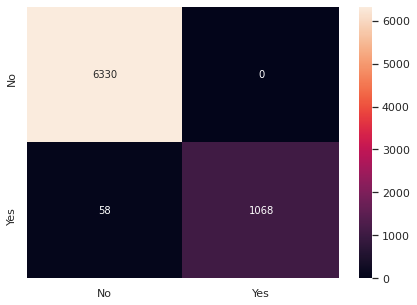

In [117]:
y_predict = catboost.predict(X_train)
print(catboost.score(X_train, y_train))
cm=metrics.confusion_matrix(y_train, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

In [118]:
print(metrics.classification_report(y_train, y_predict,digits=2))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      6330
           1       1.00      0.95      0.97      1126

    accuracy                           0.99      7456
   macro avg       1.00      0.97      0.98      7456
weighted avg       0.99      0.99      0.99      7456



0.9737171464330413


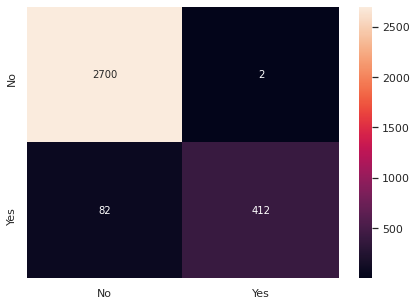

In [119]:
y_predict = catboost.predict(X_test)
print(catboost.score(X_test, y_test))
cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

In [120]:
print(metrics.classification_report(y_test, y_predict,digits=2))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      2702
           1       1.00      0.83      0.91       494

    accuracy                           0.97      3196
   macro avg       0.98      0.92      0.95      3196
weighted avg       0.97      0.97      0.97      3196



No handles with labels found to put in legend.


AUC: 1.000


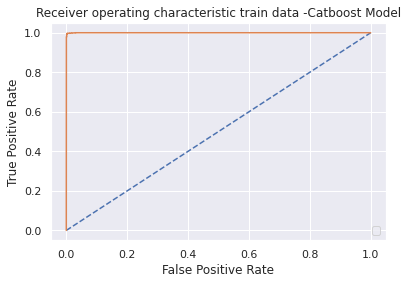

In [121]:
# predict probabilities
probs = catboost.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % train_auc)
# calculate roc curve
train_fpr,train_tpr,train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic train data -Catboost Model')
plt.legend(loc="lower right")
plt.savefig('Catboost Model _ROC')

No handles with labels found to put in legend.


AUC: 0.998


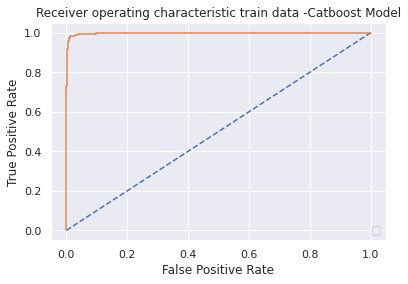

In [122]:
# predict probabilities
probs = catboost.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % test_auc)
# calculate roc curve
test_fpr,test_tpr,train_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic train data -Catboost Model')
plt.legend(loc="lower right")
plt.savefig('Catboost Model _ROC')

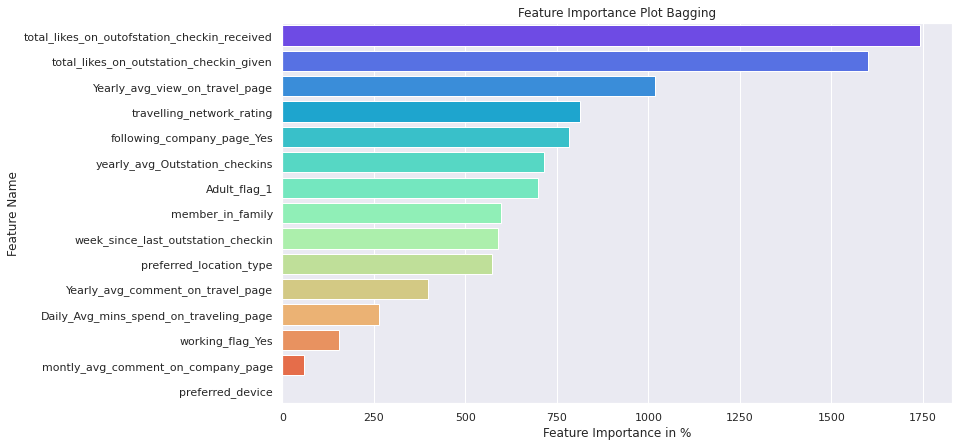

In [123]:
x=pd.DataFrame(catboost.feature_importances_*100,index=X_train.columns).sort_values(by=0,ascending=False)
plt.figure(figsize=(12,7))
sns.barplot(x[0],x.index,palette='rainbow')
plt.ylabel('Feature Name')
plt.xlabel('Feature Importance in %')
plt.title('Feature Importance Plot Bagging')
plt.show()

In [124]:
#Permutation Importance
perm = PermutationImportance(catboost, scoring = 'accuracy' ,random_state=101).fit(X_test, y_test,)
show_weights(perm, feature_names = list(X_test.columns))

Weight,Feature
0.0772 ± 0.0039,total_likes_on_outofstation_checkin_received
0.0698 ± 0.0073,following_company_page_Yes
0.0514 ± 0.0052,total_likes_on_outstation_checkin_given
0.0389 ± 0.0086,Yearly_avg_view_on_travel_page
0.0313 ± 0.0021,travelling_network_rating
0.0298 ± 0.0069,Adult_flag_1
0.0270 ± 0.0032,yearly_avg_Outstation_checkins
0.0240 ± 0.0029,preferred_location_type
0.0228 ± 0.0020,member_in_family
0.0213 ± 0.0051,week_since_last_outstation_checkin


## 10) Extreme Gradient Boosting Machine (XG-BOOST)

In [125]:
import xgboost as xgb

In [126]:
clfXGB=xgb.XGBClassifier(n_estimators=1000,learning_rate=0.01, max_depth=9)
clfXGB.fit(X_train, y_train)
y_pred_train=clfXGB.predict(X_train)
model_scoreXGB=clfXGB.score(X_train,y_train)
print(model_scoreXGB)
print(metrics.confusion_matrix(y_train,y_pred_train))
print(metrics.classification_report(y_train, y_pred_train))

1.0
[[6330    0]
 [   0 1126]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6330
           1       1.00      1.00      1.00      1126

    accuracy                           1.00      7456
   macro avg       1.00      1.00      1.00      7456
weighted avg       1.00      1.00      1.00      7456



In [127]:
#clfXGB=xgb.XGBClassifier(n_estimators=1000,learning_rate=0.01, max_depth=9 )
#clfXGB.fit(X_train, y_train)
y_pred_test=clfXGB.predict(X_test)
model_scoreXGB=clfXGB.score(X_test,y_test)
print(model_scoreXGB)
print(metrics.confusion_matrix(y_test,y_pred_test))
print(metrics.classification_report(y_test, y_pred_test))

0.9881101376720901
[[2698    4]
 [  34  460]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2702
           1       0.99      0.93      0.96       494

    accuracy                           0.99      3196
   macro avg       0.99      0.96      0.98      3196
weighted avg       0.99      0.99      0.99      3196



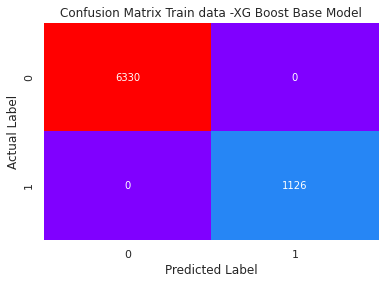

In [128]:
# Print Confusion Matrix

sns.heatmap(confusion_matrix(y_train,y_pred_train),annot=True, fmt='d', cbar=False,cmap='rainbow')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix Train data -XG Boost Base Model')
plt.show()
plt.show()

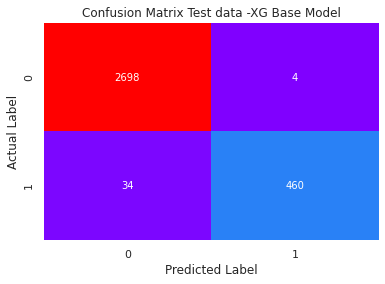

In [129]:
# Print Confusion Matrix

sns.heatmap(confusion_matrix(y_test,y_pred_test),annot=True, fmt='d', cbar=False,cmap='rainbow')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix Test data -XG Base Model')
plt.show()
plt.show()

AUC: 1.000


No handles with labels found to put in legend.


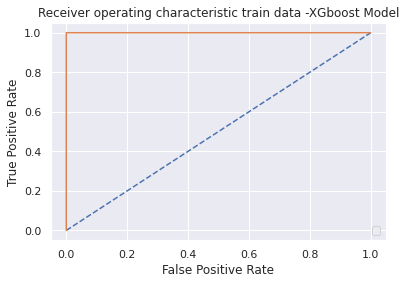

In [130]:
# predict probabilities
probs = clfXGB.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % train_auc)
# calculate roc curve
train_fpr,train_tpr,train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic train data -XGboost Model')
plt.legend(loc="lower right")
plt.savefig('Xgboost Model _ROC')

No handles with labels found to put in legend.


AUC: 0.998


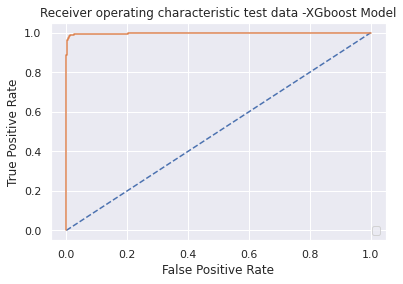

In [131]:
# predict probabilities
probs = clfXGB.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
train_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % test_auc)
# calculate roc curve
test_fpr,test_tpr,test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic test data -XGboost Model')
plt.legend(loc="lower right")
plt.savefig('Xgboost Model _ROC')

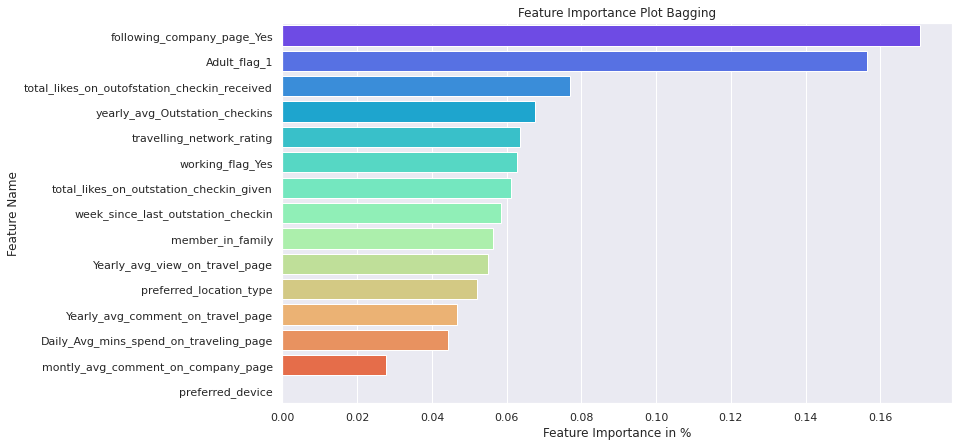

In [132]:
x=pd.DataFrame(clfXGB.feature_importances_,index=X_train.columns).sort_values(by=0,ascending=False)
plt.figure(figsize=(12,7))
sns.barplot(x[0],x.index,palette='rainbow')
plt.ylabel('Feature Name')
plt.xlabel('Feature Importance in %')
plt.title('Feature Importance Plot Bagging')
plt.show()

In [134]:
pd.DataFrame(clfXGB.feature_importances_,index=X_train.columns).sort_values(by=0,ascending=False)

,0
following_company_page_Yes,0.170658
Adult_flag_1,0.156408
total_likes_on_outofstation_checkin_received,0.076870
yearly_avg_Outstation_checkins,0.067669
travelling_network_rating,0.063511
working_flag_Yes,0.062710
total_likes_on_outstation_checkin_given,0.061272
week_since_last_outstation_checkin,0.058493
member_in_family,0.056456
Yearly_avg_view_on_travel_page,0.055036


In [135]:
#Permutation Importance
perm = PermutationImportance(clfXGB, scoring = 'accuracy' ,random_state=1).fit(X_test, y_test,)
show_weights(perm, feature_names = list(X_test.columns))

Weight,Feature
0.0948 ± 0.0087,total_likes_on_outofstation_checkin_received
0.0891 ± 0.0097,following_company_page_Yes
0.0680 ± 0.0072,Adult_flag_1
0.0564 ± 0.0049,total_likes_on_outstation_checkin_given
0.0356 ± 0.0018,Yearly_avg_view_on_travel_page
0.0327 ± 0.0050,yearly_avg_Outstation_checkins
0.0248 ± 0.0028,travelling_network_rating
0.0194 ± 0.0043,week_since_last_outstation_checkin
0.0186 ± 0.0036,preferred_location_type
0.0084 ± 0.0028,member_in_family


## 11) Gaussian Naive Bayes

In [136]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

In [137]:
NB_model = GaussianNB()
NB_model.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [138]:
# Performance Matrix on train data set

y_train_predict = NB_model.predict(X_train)
model_score = NB_model.score(X_train, y_train)                      ## Accuracy
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))          ## confusion_matrix
print(metrics.classification_report(y_train, y_train_predict))  

0.8621244635193133
[[6224  106]
 [ 922  204]]
              precision    recall  f1-score   support

           0       0.87      0.98      0.92      6330
           1       0.66      0.18      0.28      1126

    accuracy                           0.86      7456
   macro avg       0.76      0.58      0.60      7456
weighted avg       0.84      0.86      0.83      7456



In [139]:
## Performance Matrix on test data set
y_test_predict = NB_model.predict(X_test)
model_score = NB_model.score(X_test, y_test)                    ## Accuracy
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))         ## confusion_matrix
print(metrics.classification_report(y_test, y_test_predict))  

0.8629536921151439
[[2660   42]
 [ 396   98]]
              precision    recall  f1-score   support

           0       0.87      0.98      0.92      2702
           1       0.70      0.20      0.31       494

    accuracy                           0.86      3196
   macro avg       0.79      0.59      0.62      3196
weighted avg       0.84      0.86      0.83      3196



No handles with labels found to put in legend.


AUC: 0.749


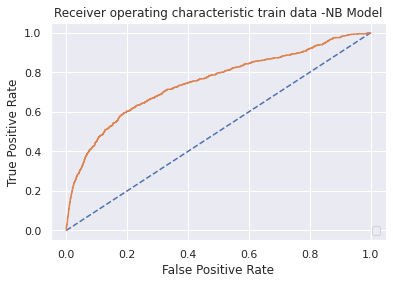

In [140]:
# predict probabilities
probs = NB_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % train_auc)
# calculate roc curve
train_fpr,train_tpr,train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic train data -NB Model')
plt.legend(loc="lower right")
plt.savefig('NB Model _ROC')

No handles with labels found to put in legend.


AUC: 0.764


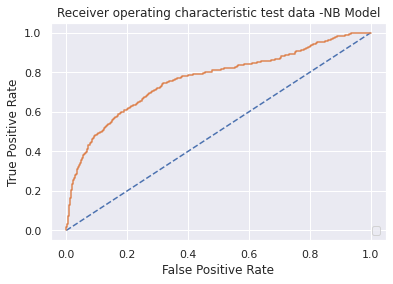

In [141]:
# predict probabilities
probs = NB_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % test_auc)
# calculate roc curve
test_fpr,test_tpr,train_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic test data -NB Model')
plt.legend(loc="lower right")
plt.savefig('NB Model _ROC')

In [142]:
#Permutation Importance
perm = PermutationImportance(NB_model, scoring = 'accuracy' ,random_state=1).fit(X_test, y_test,)
show_weights(perm, feature_names = list(X_test.columns))

Weight,Feature
0.0192 ± 0.0042,following_company_page_Yes
0.0110 ± 0.0029,Adult_flag_1
0.0101 ± 0.0043,Yearly_avg_view_on_travel_page
0.0096 ± 0.0023,preferred_location_type
0.0079 ± 0.0031,Daily_Avg_mins_spend_on_traveling_page
0.0072 ± 0.0048,yearly_avg_Outstation_checkins
0.0053 ± 0.0021,total_likes_on_outofstation_checkin_received
0.0028 ± 0.0027,total_likes_on_outstation_checkin_given
0.0023 ± 0.0024,travelling_network_rating
0.0021 ± 0.0019,member_in_family


## 12) KNN _Model

Generally, good KNN performance usually requires preprocessing of data to make all variables similarly scaled and centered

Now lets apply zscore on continues columns and see the performance for KNN


In [143]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler

In [144]:
sc = StandardScaler()

In [145]:
X_train = sc.fit_transform(X_train)

In [146]:
X_test = sc.transform(X_test)

In [147]:
KNN_model=KNeighborsClassifier()
KNN_model.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [148]:
## Performance Matrix on train data set
y_train_predict = KNN_model.predict(X_train)
model_score = KNN_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.9837714592274678
[[6310   20]
 [ 101 1025]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      6330
           1       0.98      0.91      0.94      1126

    accuracy                           0.98      7456
   macro avg       0.98      0.95      0.97      7456
weighted avg       0.98      0.98      0.98      7456



In [149]:
## Performance Matrix on test data set
y_test_predict = KNN_model.predict(X_test)
model_score = KNN_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.9633917396745932
[[2680   22]
 [  95  399]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      2702
           1       0.95      0.81      0.87       494

    accuracy                           0.96      3196
   macro avg       0.96      0.90      0.93      3196
weighted avg       0.96      0.96      0.96      3196



No handles with labels found to put in legend.


AUC: 0.998


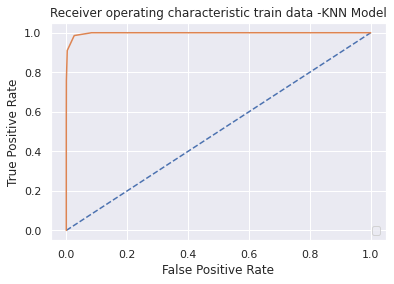

In [150]:
# predict probabilities
probs = KNN_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % train_auc)
# calculate roc curve
train_fpr,train_tpr,train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic train data -KNN Model')
plt.legend(loc="lower right")
plt.savefig('KNN Model _ROC')

No handles with labels found to put in legend.


AUC: 0.981


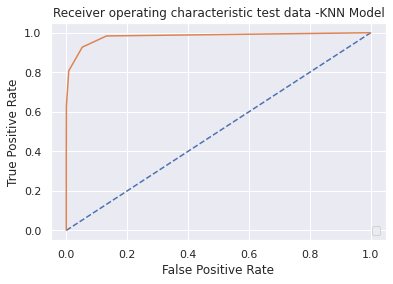

In [151]:
# predict probabilities
probs = KNN_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % test_auc)
# calculate roc curve
test_fpr,test_tpr,test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic test data -KNN Model')
plt.legend(loc="lower right")
plt.savefig('KNN Model _ROC')

In [152]:
# Default value n_neighbors=5, lets check the performance for K=7

In [153]:
KNN_model=KNeighborsClassifier(n_neighbors=7)
KNN_model.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

In [154]:
## Performance Matrix on train data set
y_train_predict = KNN_model.predict(X_train)
model_score = KNN_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.9698229613733905
[[6296   34]
 [ 191  935]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      6330
           1       0.96      0.83      0.89      1126

    accuracy                           0.97      7456
   macro avg       0.97      0.91      0.94      7456
weighted avg       0.97      0.97      0.97      7456



In [155]:
## Performance Matrix on test data set
y_test_predict = KNN_model.predict(X_test)
model_score = KNN_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.9458698372966208
[[2672   30]
 [ 143  351]]
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      2702
           1       0.92      0.71      0.80       494

    accuracy                           0.95      3196
   macro avg       0.94      0.85      0.89      3196
weighted avg       0.94      0.95      0.94      3196



In [156]:
# Run the KNN with no of neighbours to be 1,3,5..19 and *Find the optimal number of neighbours from K=1,3,5,7....19 using the Mis classification error
# 
# Hint: Misclassification error (MCE) = 1 - Test accuracy score. Calculated MCE for each model with neighbours = 1,3,5...19 and find the model with lowest MCE

In [157]:
# empty list that will hold accuracy scores
ac_scores = []

# perform accuracy metrics for values from 1,3,5....19
for k in range(1,20,2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    # evaluate test accuracy
    scores = knn.score(X_test, y_test)
    ac_scores.append(scores)

# changing to misclassification error
MCE = [1 - x for x in ac_scores]
MCE

[0.00844806007509391,
 0.02252816020025028,
 0.03660826032540676,
 0.054130162703379225,
 0.07352941176470584,
 0.08760951188986232,
 0.09793491864831039,
 0.10826032540675845,
 0.11295369211514394,
 0.11514392991239053]

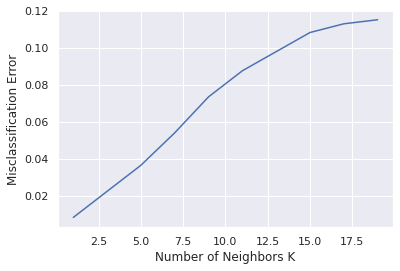

In [158]:
# Plot misclassification error vs k (with k value on X-axis) using matplotli

import matplotlib.pyplot as plt
# plot misclassification error vs k
plt.plot(range(1,20,2), MCE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

In [159]:
KNN_model=KNeighborsClassifier(n_neighbors=17)
KNN_model.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=17, p=2,
                     weights='uniform')

In [160]:
## Performance Matrix on train data set
y_train_predict = KNN_model.predict(X_train)
model_score = KNN_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8935085836909872
[[6279   51]
 [ 743  383]]
              precision    recall  f1-score   support

           0       0.89      0.99      0.94      6330
           1       0.88      0.34      0.49      1126

    accuracy                           0.89      7456
   macro avg       0.89      0.67      0.72      7456
weighted avg       0.89      0.89      0.87      7456



In [161]:
## Performance Matrix on test data set
y_test_predict = KNN_model.predict(X_test)
model_score = KNN_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8870463078848561
[[2672   30]
 [ 331  163]]
              precision    recall  f1-score   support

           0       0.89      0.99      0.94      2702
           1       0.84      0.33      0.47       494

    accuracy                           0.89      3196
   macro avg       0.87      0.66      0.71      3196
weighted avg       0.88      0.89      0.87      3196



## 13) ANN Model

In [162]:
from sklearn.neural_network import MLPClassifier

In [163]:
sc = StandardScaler()

In [164]:
X_train = sc.fit_transform(X_train)

In [165]:
X_test = sc.transform(X_test)

In [166]:
clf = MLPClassifier(hidden_layer_sizes=100, max_iter=5000,
                     solver='sgd', verbose=True,  random_state=21,tol=0.01)

In [167]:
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

Iteration 1, loss = 0.61514329
Iteration 2, loss = 0.50751947
Iteration 3, loss = 0.46392308
Iteration 4, loss = 0.44377979
Iteration 5, loss = 0.43189101
Iteration 6, loss = 0.42335529
Iteration 7, loss = 0.41646562
Iteration 8, loss = 0.41055265
Iteration 9, loss = 0.40534089
Iteration 10, loss = 0.40077083
Iteration 11, loss = 0.39653711
Iteration 12, loss = 0.39267564
Iteration 13, loss = 0.38916873
Iteration 14, loss = 0.38599888
Iteration 15, loss = 0.38312354
Iteration 16, loss = 0.38045007
Training loss did not improve more than tol=0.010000 for 10 consecutive epochs. Stopping.


In [168]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[2701,    1],
       [ 484,   10]])

In [169]:
pred2 = clf.predict(X_train)
confusion_matrix(y_train,pred2)

array([[6321,    9],
       [1109,   17]])

In [170]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2702
           1       0.91      0.02      0.04       494

    accuracy                           0.85      3196
   macro avg       0.88      0.51      0.48      3196
weighted avg       0.86      0.85      0.78      3196



In [171]:
print(classification_report(y_train, pred2))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      6330
           1       0.65      0.02      0.03      1126

    accuracy                           0.85      7456
   macro avg       0.75      0.51      0.47      7456
weighted avg       0.82      0.85      0.78      7456



AUC: 0.736


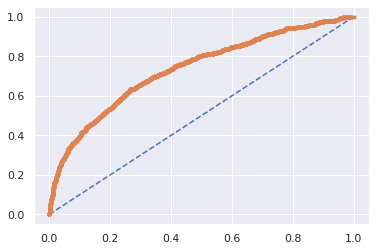

In [172]:
# AUC and ROC for the training data

# predict probabilities
probs = clf.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

AUC: 0.767


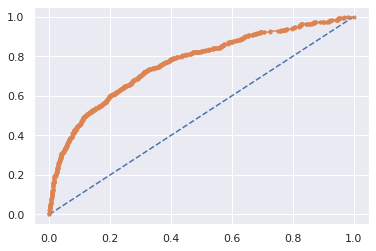

In [173]:
# AUC and ROC for the test data

# predict probabilities
probs = clf.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()